60201359 이주영 6주차 과제

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/student.csv')
df.head()

,gre,gpa,rank,sex,age,nationality,admission
0,380.0,3.61,3,f,19,Korea,불합격
1,660.0,3.67,3,f,18,Korea,NaN
2,800.0,4.00,1,m,19,Korea,합격
3,NaN,3.19,4,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격


In [3]:
#전처리 - 국적 삭제
df = df.drop(['nationality'], axis=1)

#결측치 확인
df.isnull().sum()

gre          2
gpa          2
rank         0
sex          0
age          0
admission    2
dtype: int64

In [4]:
#gre, gpa 결측값은 평균으로 대체하고, admission 결측값은 삭제
df.gre.fillna(df['gre'].mean(), inplace=True)
df.gpa.fillna(df['gpa'].mean(), inplace=True)
df.dropna(subset=['admission'], inplace=True)
df

,gre,gpa,rank,sex,age,admission
0,380.000000,3.610000,3,f,19,불합격
2,800.000000,4.000000,1,m,19,합격
3,587.889447,3.190000,4,m,19,합격
4,520.000000,2.930000,4,f,19,불합격
5,760.000000,3.000000,2,f,19,합격
...,...,...,...,...,...,...
395,620.000000,4.000000,2,f,20,불합격
396,560.000000,3.040000,3,m,18,불합격
397,460.000000,2.630000,2,m,19,불합격
398,700.000000,3.389497,2,m,19,불합격


In [5]:
#gre 소수점 버림, gpa 소수점 둘째자리에서 반올림
df['gre'] = df['gre'].apply(np.floor)
df['gpa']= round(df['gpa'], 2)

#남1 여2, 합격1 불합격0
df["sex"]=df.sex.map({"m":1, "f":0})
df["admission"]=df.admission.map({"합격":1, "불합격":0}).astype(int)
df

,gre,gpa,rank,sex,age,admission
0,380.0,3.61,3,0,19,0
2,800.0,4.00,1,1,19,1
3,587.0,3.19,4,1,19,1
4,520.0,2.93,4,0,19,0
5,760.0,3.00,2,0,19,1
...,...,...,...,...,...,...
395,620.0,4.00,2,0,20,0
396,560.0,3.04,3,1,18,0
397,460.0,2.63,2,1,19,0
398,700.0,3.39,2,1,19,0


In [9]:
counts = df['admission'].value_counts()
print(counts)
#합격이 불합격보다 2배 이상 많아 오버샘플링 한다.

0    272
1    126
Name: admission, dtype: int64


In [10]:
#X, y로 데이터 분리
X = np.array(df.iloc[:,:-1])
y = np.array(df.admission)
X

array([[380.  ,   3.61,   3.  ,   0.  ,  19.  ],
       [800.  ,   4.  ,   1.  ,   1.  ,  19.  ],
       [587.  ,   3.19,   4.  ,   1.  ,  19.  ],
       ...,
       [460.  ,   2.63,   2.  ,   1.  ,  19.  ],
       [700.  ,   3.39,   2.  ,   1.  ,  19.  ],
       [600.  ,   3.89,   3.  ,   1.  ,  19.  ]])

In [11]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [14]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 샘플링 결과 확인
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: 0    185
1     93
dtype: int64
After SMOTE: 0    185
1    185
dtype: int64


In [15]:
#데이터 스케일링 : 전처리 단계에서 수행
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

rf_std = RandomForestClassifier(n_estimators=100, random_state=42)
rf_std.fit(X_train_std, y_train)
y_pred_std = rf_std.predict(X_test_std)
acc_std = accuracy_score(y_test, y_pred_std)

print('standard scaling 정확도:', acc_std)

standard scaling 정확도: 0.7333333333333333


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

rf_minmax = RandomForestClassifier(n_estimators=100, random_state=42)
rf_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = rf_minmax.predict(X_test_minmax)
acc_minmax = accuracy_score(y_test, y_pred_minmax)

print('min-max scaling 정확도:', acc_minmax)

min-max scaling 정확도: 0.7416666666666667


In [17]:
#스케일링 정확도가 더 높은 min-max 방식으로 선택하였다.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

결정계수 :  0.843396401749295


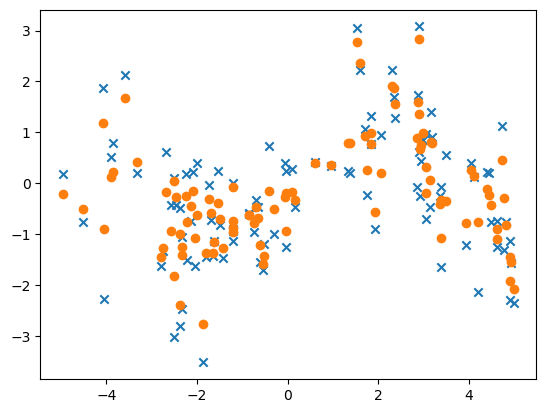

결정계수 :  0.8590823167656398


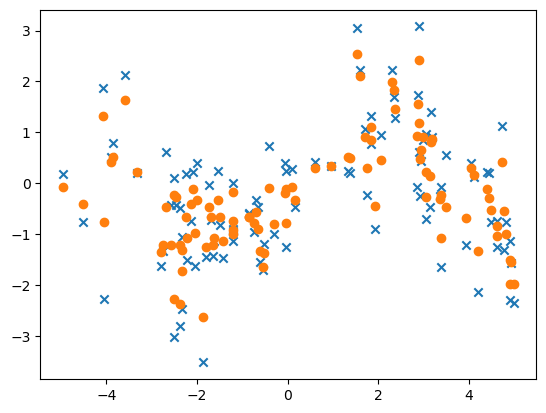

결정계수 :  0.8561322769274058


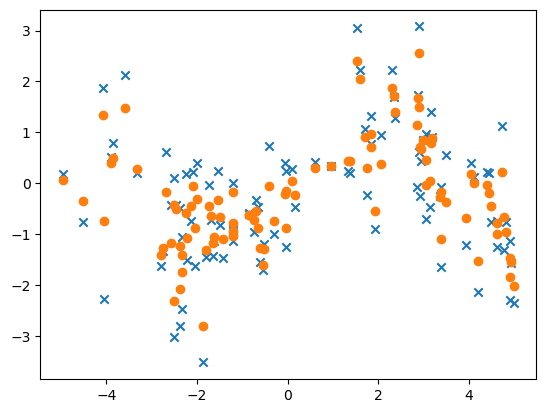

결정계수 :  0.8536128541266577


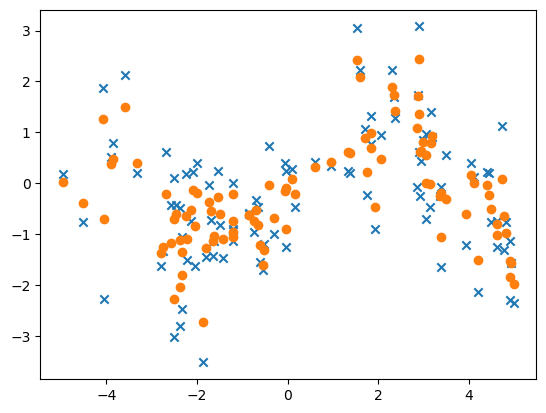

In [19]:
import matplotlib.pyplot as plt
import math

x = np.random.rand(100,1)
x = x * 10-5

y = np.array([math.sin(i) for i in x])
y = y + np.random.randn(100)

#랜덤포레스트 모델
from sklearn.ensemble import RandomForestRegressor
#트리가 10 20 30 40개일 때
for i in (10, 20, 30, 40):
  model = RandomForestRegressor(n_estimators = i, random_state = 15)
  model.fit(x, y)

  relation_square = model.score(x, y)
  print('결정계수 : ', relation_square)
  
  y_p = model.predict(x)

  plt.scatter(x,y, marker = 'x')
  plt.scatter(x,y_p, marker = 'o')

  plt.show()

n_estimators = 20 

랜덤이라 실행할 때마다 결과가 조금씩 다르게 나오지만 10 20 30 40개 나무일 때 20개 나무일 때 결정계수가 0.85로 높아 20개로 결정하였다.

In [20]:
#랜덤포레스트 모델 만들기
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [21]:
#테스트
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

temp_y_pred_rf=RF.predict(X_test)
temp_acc = accuracy_score(y_test, temp_y_pred_rf)
print('정확도:', temp_acc)

정확도: 0.7333333333333333


In [22]:
scores = []
for i in range(10,400,5):
    RF=RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train,y_train)
    
    att= RF.predict(X_test)
    acc = accuracy_score(y_test,att)
    scores.append(acc)
    
    print('>%d, acc: %.3f'% (i, acc))

>10, acc: 0.692
>15, acc: 0.700
>20, acc: 0.733
>25, acc: 0.700
>30, acc: 0.725
>35, acc: 0.717
>40, acc: 0.733
>45, acc: 0.725
>50, acc: 0.742
>55, acc: 0.717
>60, acc: 0.742
>65, acc: 0.742
>70, acc: 0.742
>75, acc: 0.742
>80, acc: 0.742
>85, acc: 0.742
>90, acc: 0.742
>95, acc: 0.742
>100, acc: 0.750
>105, acc: 0.750
>110, acc: 0.742
>115, acc: 0.750
>120, acc: 0.758
>125, acc: 0.758
>130, acc: 0.750
>135, acc: 0.758
>140, acc: 0.758
>145, acc: 0.758
>150, acc: 0.750
>155, acc: 0.758
>160, acc: 0.750
>165, acc: 0.750
>170, acc: 0.750
>175, acc: 0.742
>180, acc: 0.742
>185, acc: 0.742
>190, acc: 0.750
>195, acc: 0.750
>200, acc: 0.742
>205, acc: 0.733
>210, acc: 0.742
>215, acc: 0.742
>220, acc: 0.750
>225, acc: 0.758
>230, acc: 0.758
>235, acc: 0.742
>240, acc: 0.758
>245, acc: 0.750
>250, acc: 0.750
>255, acc: 0.750
>260, acc: 0.750
>265, acc: 0.750
>270, acc: 0.750
>275, acc: 0.750
>280, acc: 0.758
>285, acc: 0.750
>290, acc: 0.758
>295, acc: 0.758
>300, acc: 0.750
>305, acc: 0.75

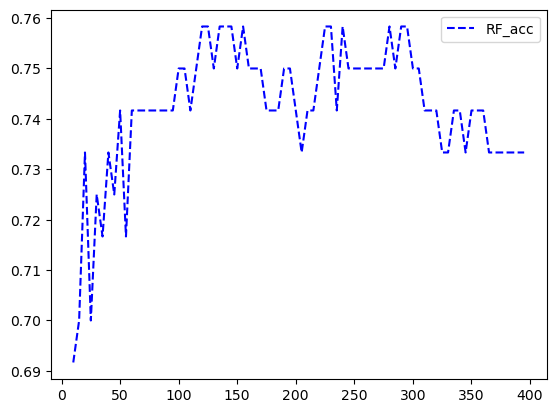

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(10,400,5), scores, 'b--', label='RF_acc')
plt.legend()

In [24]:
#n_estmators =140으로 새로 적합
RF=RandomForestClassifier(n_estimators=140, random_state=0)
RF.fit(X_train, y_train)
temp_y_pred_rf = RF.predict(X_test)

In [25]:
#랜덤포레스트 모델성능
print('accuracy :', accuracy_score(y_test, temp_y_pred_rf))
print('precision :', precision_score(y_test, temp_y_pred_rf))
print('recall :', recall_score(y_test, temp_y_pred_rf))
print('f1 :', f1_score(y_test, temp_y_pred_rf))

accuracy : 0.7583333333333333
precision : 0.5909090909090909
recall : 0.3939393939393939
f1 : 0.4727272727272727


후기

standard 스케일링과 min-max 스케일링을 썼고, min-max 스케일링의 정확도가 높게 나왔다. 합격 불합격을 나누는 모델이다보니 정규분포가 아닌 경우에 효과적인 min max모델의 정확도가 높게 나온 것 같다. 

블로그에서 나무의 수(n_estimators)에 따른 결정계수를 비교하는 글을 보고 따라해보았다. 결정계수가 높게 나온 나무 수 = 20개로 모델을 만들어봤을 때 정확도가 73.3%가 나왔고, 실습 때 배운 방법으로 구한 나무 수 =140개로 만들었을 때 정확도가 75.8%로 더 높게 나왔다. 나무 수도 많고, 긴 목록으로 비교하여 선택한 거라 정확도가 높은 것 같지만 다른 방법으로도 나무 수를 선택할 수 있어 흥미로웠다.